In [4]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np

In [5]:
# Define constants
IMAGE_SIZE = (20, 20)  # Fixed size based on the dataset specification
BATCH_SIZE = 32

In [6]:
# Directory paths
data_dir = 'images'
plane_dir = os.path.join(data_dir, 'plane')
no_plane_dir = os.path.join(data_dir, 'no_plane')

In [7]:
# Create plane and no_plane directories if they don't exist
os.makedirs(plane_dir, exist_ok=True)
os.makedirs(no_plane_dir, exist_ok=True)

In [8]:
# Move images to plane and no_plane directories based on the filename
for filename in os.listdir(data_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(data_dir, filename)

        if filename.startswith("1"):
            shutil.move(img_path, os.path.join(plane_dir, filename))
        else:
            shutil.move(img_path, os.path.join(no_plane_dir, filename))

In [9]:
# Function to load and preprocess images
def load_and_preprocess_images(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(directory, filename)

            if filename.startswith("1"):
                labels.append(1)  # Assign label 1 for plane
            else:
                labels.append(0)  # Assign label 0 for no-plane

            img = Image.open(img_path)
            img_array = np.array(img)
            images.append(img_array)

    return np.array(images), np.array(labels)

In [10]:
# Split data into training, validation, and test sets
plane_images, plane_labels = load_and_preprocess_images(plane_dir)

In [11]:
no_plane_images, no_plane_labels = load_and_preprocess_images(no_plane_dir)

In [12]:
# Split the data further into training, validation, and test sets
X_train_plane, X_val_plane, y_train_plane, y_val_plane = train_test_split(plane_images, plane_labels, test_size=0.2, random_state=42)

X_train_no_plane, X_val_no_plane, y_train_no_plane, y_val_no_plane = train_test_split(no_plane_images, no_plane_labels, test_size=0.2, random_state=42)

In [13]:
# Combine plane and no-plane data for training, validation, and test sets
X_train = np.concatenate((X_train_plane, X_train_no_plane), axis=0)
y_train = np.concatenate((y_train_plane, y_train_no_plane), axis=0)
X_val = np.concatenate((X_val_plane, X_val_no_plane), axis=0)
y_val = np.concatenate((y_val_plane, y_val_no_plane), axis=0)

In [14]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

In [15]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
train_datagen.fit(X_train)

In [17]:
# Create data generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=BATCH_SIZE, shuffle=True)
validation_generator = (X_val, y_val)  # No augmentation for validation data

In [18]:
# Example: Print the shape of the training set
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (25600, 20, 20, 3)
y_train shape: (25600, 2)


In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [20]:
# Define the CNN model
model = models.Sequential()


In [21]:
# Convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [22]:
# Flatten layer and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # 2 output neurons for binary classification

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,  # You can adjust the number of epochs based on the training performance
                    validation_data=validation_generator)

Epoch 1/10


800/800 [==============================] - 12s 14ms/step - loss: 0.6952 - accuracy: 0.7743 - val_loss: 0.3104 - val_accuracy: 0.8625
Epoch 2/10
800/800 [==============================] - 13s 16ms/step - loss: 0.3900 - accuracy: 0.8286 - val_loss: 0.2812 - val_accuracy: 0.8889
Epoch 3/10
800/800 [==============================] - 12s 15ms/step - loss: 0.3591 - accuracy: 0.8436 - val_loss: 0.2908 - val_accuracy: 0.8923
Epoch 4/10
800/800 [==============================] - 12s 15ms/step - loss: 0.3324 - accuracy: 0.8552 - val_loss: 0.2270 - val_accuracy: 0.9097
Epoch 5/10
800/800 [==============================] - 11s 14ms/step - loss: 0.3186 - accuracy: 0.8614 - val_loss: 0.2303 - val_accuracy: 0.9097
Epoch 6/10
800/800 [==============================] - 11s 14ms/step - loss: 0.3086 - accuracy: 0.8670 - val_loss: 0.2489 - val_accuracy: 0.8992
Epoch 7/10
800/800 [==============================] - 13s 16ms/step - loss: 0.3087 - accuracy: 0.8687 - val_loss: 0.2411 - val_accurac

In [28]:
# Print shapes for debugging
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (6400, 20, 20, 3)
y_val shape: (6400, 2)


In [29]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Directory path for scene images
scenes_dir = 'scenes'

# List scene images
scene_images = [f for f in os.listdir(scenes_dir) if f.endswith(".png")]

In [30]:
# Load and preprocess scene images
predictions_all = []

for scene_image in scene_images:
    img_path = os.path.join(scenes_dir, scene_image)
    img = image.load_img(img_path)  # Omit target_size to load the original size
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to between 0 and 1
    
    # Get the original image dimensions
    original_height, original_width, _ = img_array.shape

    # Define the patch size and step size
    patch_size = 20
    step_size = patch_size // 2

    # Slide a window across the image
    for y in range(0, original_height - patch_size + 1, step_size):
        for x in range(0, original_width - patch_size + 1, step_size):
            # Extract the patch
            patch = img_array[y:y+patch_size, x:x+patch_size, :]
            
            # Make prediction on the patch
            patch_prediction = model.predict(np.expand_dims(patch, axis=0))
            
            # Append prediction information
            predictions_all.append((y, x, patch_prediction[0, 1]))

ValueError: in user code:

    File "c:\Users\15714\Documents\CS4804\satellite-classifier\env\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\15714\Documents\CS4804\satellite-classifier\env\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\15714\Documents\CS4804\satellite-classifier\env\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\15714\Documents\CS4804\satellite-classifier\env\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "c:\Users\15714\Documents\CS4804\satellite-classifier\env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\15714\Documents\CS4804\satellite-classifier\env\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 20, 20, 3), found shape=(None, 32, 32, 3)


In [ ]:
# Combine predictions for the same location and calculate average confidence
location_to_confidence = {}
for y, x, confidence in predictions_all:
    if (y, x) not in location_to_confidence:
        location_to_confidence[(y, x)] = []
    location_to_confidence[(y, x)].append(confidence)


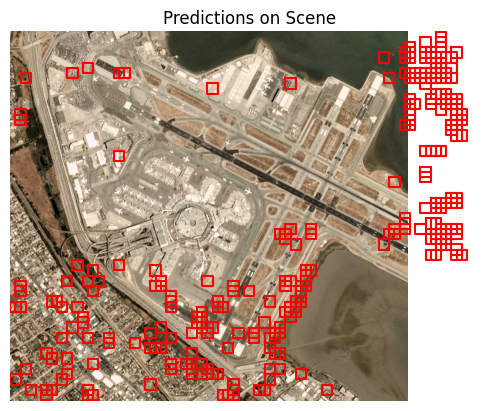

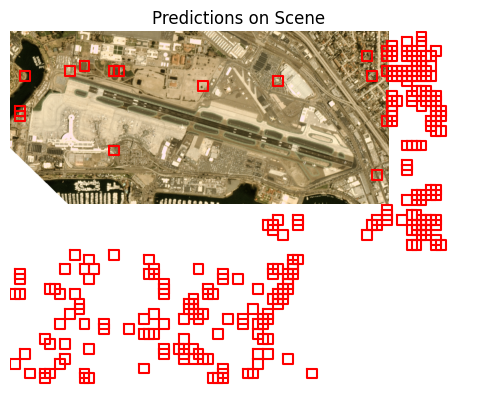

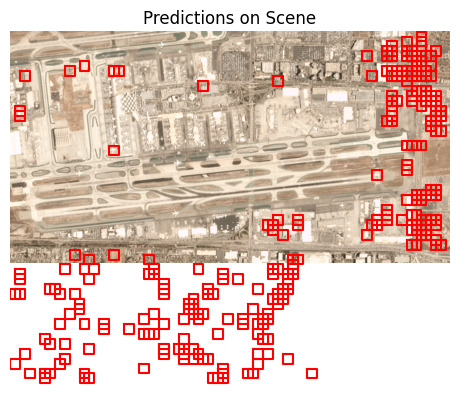

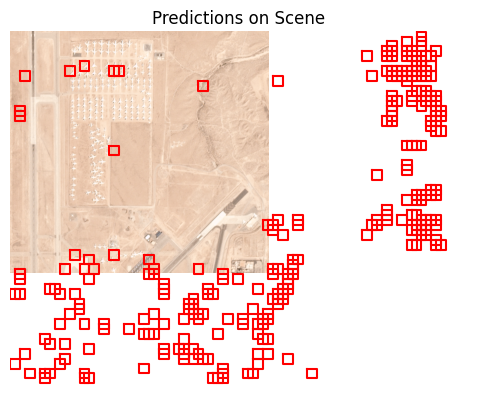

In [ ]:
# Visualize predictions on the scene images using average confidence
for scene_image in scene_images:
    img_path = os.path.join(scenes_dir, scene_image)
    img = image.load_img(img_path)
    plt.imshow(img)

    for (y, x), confidences in location_to_confidence.items():
        average_confidence = np.mean(confidences)
        if average_confidence > 0.5:  # Adjust the threshold based on your model's output
            # Draw a rectangle or marker on the image to indicate a predicted plane
            plt.plot([x, x + patch_size, x + patch_size, x, x], [y, y, y + patch_size, y + patch_size, y], color='red')

    plt.title("Predictions on Scene")
    plt.axis('off')
    plt.show()

In [ ]:
import os
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
from tensorflow.keras.preprocessing import image

In [ ]:
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
def predict_patch(patch):
    return model.predict(patch)

In [ ]:
def process_image(image_path):
    img = Image.open(image_path)
    original_width, original_height = img.size

    patch_size = 32
    step_size = patch_size // 2

    for y in range(0, original_height - patch_size + 1, step_size):
        for x in range(0, original_width - patch_size + 1, step_size):
            patch = img.crop((x, y, x + patch_size, y + patch_size))
            # Get the file path for the patch
            patch_path = f"temp_patch_{x}_{y}.png"
            patch.save(patch_path)
            img_array = preprocess_image(patch_path)
            prediction = predict_patch(img_array)

            # Display patch and prediction
            display_patch(patch, prediction)

            # Delete temporary patch file
            os.remove(patch_path)


In [ ]:
def display_patch(patch, prediction):
    patch_window = tk.Toplevel(root)
    patch_window.title("Processed Patch")

    # Display the patch
    img_tk = ImageTk.PhotoImage(patch)
    label = tk.Label(patch_window, image=img_tk)
    label.image = img_tk
    label.pack()

    # Display the prediction
    prediction_label = tk.Label(patch_window, text=f"Prediction: {prediction}")
    prediction_label.pack()

In [ ]:
def browse_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        process_image(file_path)

In [ ]:
# Create the main window
root = tk.Tk()
root.title("Image Classifier")
root.minsize(500, 500)

NameError: name 'tk' is not defined

In [ ]:
# Create GUI components
upload_button = tk.Button(root, text="Upload Image", command=browse_image)
upload_button.pack(pady=20)


In [ ]:
# Start the Tkinter event loop
root.mainloop()

1/1 [==============================] - 0s 44ms/step


: 